In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): return np.exp(x)

In [2]:
# α)

a, b = 0, 10
n  = 1000
V  = (b-a)*f(b)

def crude(n = 1000, a = 0, b = 10):
    '''crude MC integration'''
    sumf  = 0
    sumf2 = 0
    for i in range(n):
        x = np.random.uniform(a, b)
        y = f(x)
        sumf  += y
        sumf2 += y*y
    meanf   = sumf/n
    meanf2  = sumf2/n
    sigmaf2 = (meanf2 - meanf**2)*(n/(n-1))
    sigmaf  = sigmaf2**0.5
    I       = meanf*(b-a)
    dI      = (b-a)*sigmaf*n**(-0.5)
    return I, dI, dI/I

print('I = %2.2f ± %2.2f [dI/I = %2.3f] with crude MC'%(crude(n)))

I = 22017.79 ± 1402.22 [dI/I = 0.064] with crude MC


In [3]:
# β) 

def dIexactCRD(a, b, n):
    '''returns the expected uncertainty for the crude integration of f(x) = exp(x) in [a, b]'''
    dIexactcrd = (b-a)*(0.5*(1/(b-a))*(f(2*b) - f(2*a)) - ((1/(b-a))*(f(b) - f(a)))**2)**0.5/n**0.5
    return dIexactcrd

Iexact   = f(b) - f(a)
dIexactcrd = dIexactCRD(a, b, n)

print('I = %2.2f ± %2.2f  [%2.3f] expected values for crude MC'%(Iexact, dIexactcrd, dIexactcrd/Iexact))

I = 22025.47 ± 1393.09  [0.063] expected values for crude MC


In [4]:
# γ) time consuming

Iarraycrd = [crude(n)[0] for i in range(40000)]
print('n = %d'%(n))
print('Iarray std = %2.1f'%np.array(Iarraycrd).std())
print('Iarray mean = %2.1f'%np.array(Iarraycrd).mean())

n = 1000
Iarray std = 1387.4
Iarray mean = 22015.1


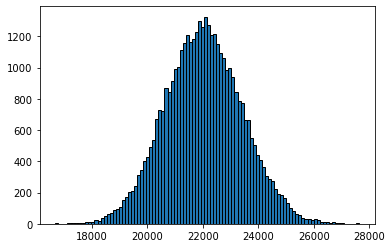

In [5]:
_ = plt.hist(Iarraycrd, bins = 100, ec = 'black')

In [6]:
# δ)

dI  = dIexactCRD(0, 10, 1000)
dI1 = dIexactCRD(0, 5, 500)
dI2 = dIexactCRD(5, 10, 500)

print('dI1 = %2.1f  dI2 = %2.1f  (dI1**2 + dI2**2)**0.5 = %2.1f exepected with crude MC'%(dI1, dI2, (dI1**2 + dI2**2)**0.5))

print('crude MC integration in one go     :%2.1f ± %2.1f [%2.3f]'%(crude(1000,0,10)))
I1, dI1, fdI1 = crude(500, 0, 5)
I2, dI2, fdI2 = crude(500, 5, 10)
print('crude MC integration in two halves :%2.1f ± %2.1f'%(I1+I2, (dI1**2 + dI2**2)**0.5))

dI1 = 8.2  dI2 = 1211.8  (dI1**2 + dI2**2)**0.5 = 1211.8 exepected with crude MC
crude MC integration in one go     :24927.9 ± 1519.5 [0.061]
crude MC integration in two halves :24507.0 ± 1269.2


In [7]:
# ε)


def hom(n = 10000, a = 0, b =10):
    '''h-o-m integration of f(x) = exp(x) in [a, b]'''
    m = 0
    for i in range(n):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, f(b))
        if y <= f(x): m += 1
            
    p   = m/float(n)
    V   = f(b)*(b - a)
    I   = p*V
    δI  = (V*(p - p**2)**0.5)/n**0.5
    return I, δI, δI/I 

print('I = %2.2f ± %2.2f [dI/I = %2.3f] with h-o-m MC'%(hom(n)))

I = 21365.67 ± 2061.46 [dI/I = 0.096] with h-o-m MC


In [8]:
# expected uncertainty for h-o-m
def homtheory(n, a, b):
    '''returns the expected uncertainty for the h-o-m integration of f(x) = exp(x) in [a, b]'''
    V = f(b)*(b-a)
    p = (f(b) - f(a))/V
    dI = V*(p-p*p)**0.5/n**0.5
    I  = p*V
    return I, dI, dI/I

print('I = %2.2f ± %2.2f  [%2.3f] expected values for h-o-m MC'%(homtheory(1000, a, b)))

I = 22025.47 ± 2089.57  [0.095] expected values for h-o-m MC


In [9]:
# repeat 40000 times the hom integration with n = 1000 (time consuming)
Iarrayhom = [hom(1000)[0] for i in range(40000)]

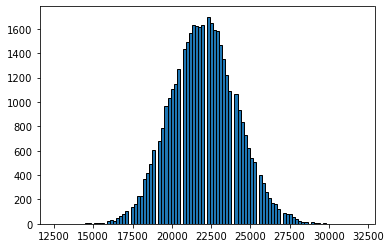

In [10]:
_ = plt.hist(Iarrayhom, bins = 100, ec = 'black')

In [11]:
# integration in two havles with N = 500
print('I = %2.2f ± %2.2f  [%2.3f] for h-o-m MC in [0, 5]'%( hom(500, 0, 5)))
print('I = %2.2f ± %2.2f  [%2.3f] expected values for h-o-m MC in [0, 5]'%(homtheory(500, 0, 5)))

# expected results when doing the integration in two halves with N = 500
print('I = %2.2f ± %2.2f  [%2.3f] for h-o-m MC in [5, 10]'%(hom(500, 5, 10)))
print('I = %2.2f ± %2.2f  [%2.3f] expected values for h-o-m MC in [5, 10]'%(homtheory(500, 5,10)))

I = 140.99 ± 13.02  [0.092] for h-o-m MC in [0, 5]
I = 147.41 ± 13.24  [0.090] expected values for h-o-m MC in [0, 5]
I = 22687.26 ± 1991.93  [0.088] for h-o-m MC in [5, 10]
I = 21878.05 ± 1965.11  [0.090] expected values for h-o-m MC in [5, 10]
